# Hugging Face Audio Course

## Unit 1. Working with audio data

### Introduction to audio data

In [1]:
!pip install librosa

In [2]:
# Load librosa to plot the waveform for an audio signal
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [6]:
array

array([-1.4068222e-03, -4.4607258e-04, -4.1098078e-04, ...,
        7.9623051e-06, -3.0417003e-05,  1.2765067e-05], dtype=float32)

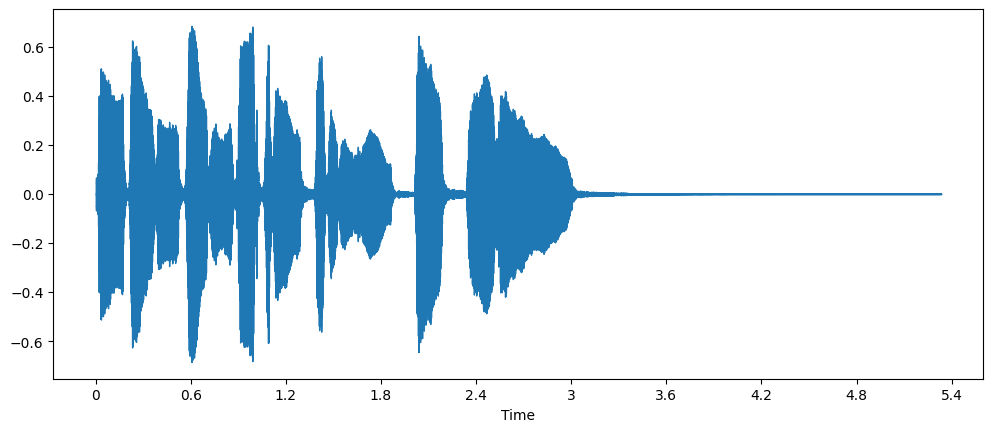

In [3]:
# Audio as a waveform
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
plt.show()

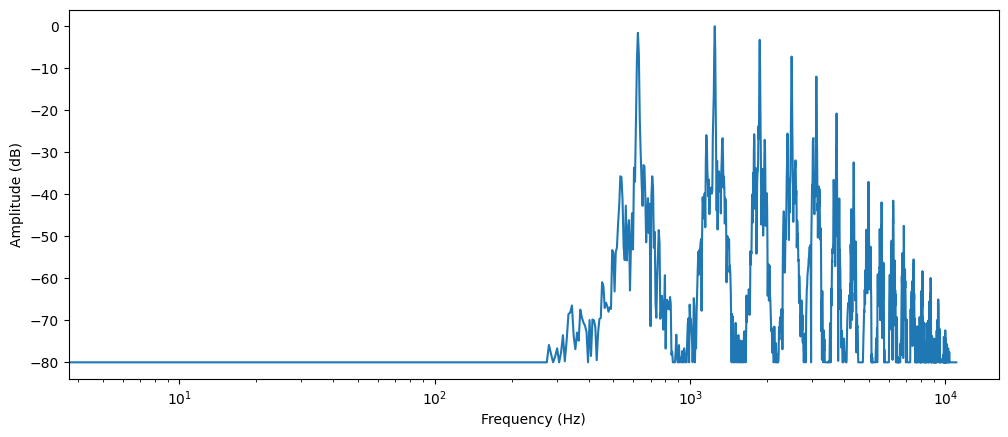

In [4]:
# Frequency spectrum
import numpy as np

dft_input = array[:4096] # first 4096 samples

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

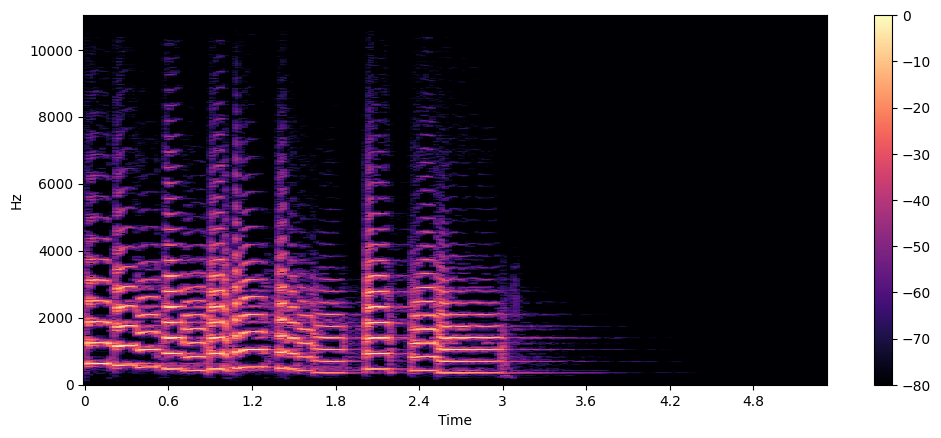

In [5]:
# Spectrogram
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

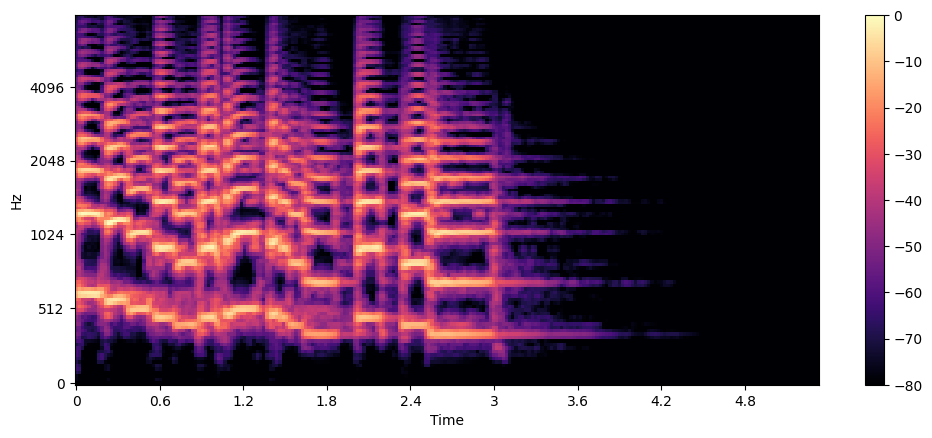

In [ ]:
# Mel spectrogram
S = librosa.feature.melspectrogram(y=array,
                                   sr=sampling_rate,
                                   n_mels=128, # nb of mel bands to generate
                                   fmax=8000) # highest freq. we care about
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate,
                         fmax=8000)
plt.colorbar()
plt.show()

### Load and explore an audio dataset

In [7]:
!pip install datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.6 MB/s eta 0:00:00


In [8]:
# Use MINDS-14: contains recordings of people asking an e-banking system
# questions in several languages and dialects
# Link to dataset: https://huggingface.co/datasets/PolyAI/minds14
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14",
                     name="en-AU", # only select the Australian subset
                     split="train")
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [9]:
# Look at one example
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [10]:
# Convert the intent to a meaningful string
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [11]:
# Remove columns:
# lang_id will have a unique value as we use a subset
# english_transcription same as transcription for the same reason
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [12]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.7 MB/s eta 0:00:00
  

In [13]:
# Listen to some samples
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


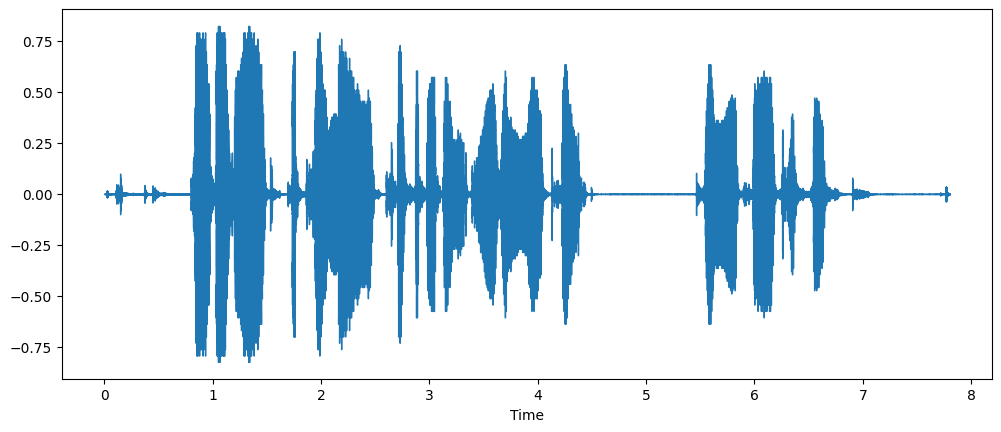

In [14]:
# Plot waveform for the first example
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
plt.show()

### Preprocessing audio data

In [15]:
# Upsample to 16kHz
from datasets import Audio

minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
minds[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
  'array': array([2.36119668e-05, 1.92324660e-04, 2.19284790e-04, ...,
         9.40907281e-04, 1.16613181e-03, 7.20883254e-04]),
  'sampling_rate': 16000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13}

In [16]:
# Filter out samples longer than 20s
MAX_DURATION_IN_SECONDS = 20.0


def is_audio_length_in_range(input_length):
    return input_length < MAX_DURATION_IN_SECONDS

In [17]:
# use librosa to get example's duration from the audio file
new_column = [librosa.get_duration(path=x) for x in minds["path"]]
minds = minds.add_column("duration", new_column)

# use Datasets' `filter` method to apply the filtering function
minds = minds.filter(is_audio_length_in_range, input_columns=["duration"])

# remove the temporary helper column
minds = minds.remove_columns(["duration"])
minds

Filter:   0%|          | 0/654 [00:00<?, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 624
})

In [18]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.5 MB/s eta 0:00:00


In [19]:
# Load Whisper
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained(
    "openai/whisper-small")

In [20]:
# Function to preprocess a single example
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"], padding=True
    )
    return features

In [21]:
# Apply to the dataset using map method
minds = minds.map(prepare_dataset)
minds

Map:   0%|          | 0/624 [00:00<?, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class', 'input_features'],
    num_rows: 624
})

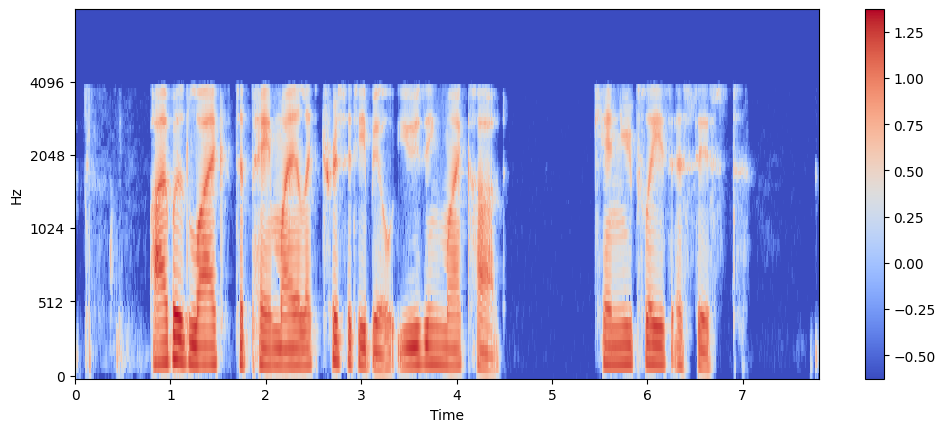

In [22]:
# Visualize for one example
import numpy as np

example = minds[0]
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length,
)
plt.colorbar()
plt.show()

In [23]:
# Load both a feature extractor and tokenizer for Whisper
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("openai/whisper-small")

### Streaming audio data

Cf: https://huggingface.co/docs/datasets/stream

In [ ]:
# Run this cell indicating the value for the access_token
# Retrieve from Hugging Face, Access Tokens
#access_token = "hf_..."

In [25]:
# Enable streaming mode
gigaspeech = load_dataset("speechcolab/gigaspeech", "xs",
                          token=access_token,
                          streaming=True)

In [26]:
# Read first example (iterate over the dataset)
next(iter(gigaspeech["train"]))

{'segment_id': 'YOU0000000315_S0000660',
 'speaker': 'N/A',
 'text': "AS THEY'RE LEAVING <COMMA> CAN KASH PULL ZAHRA ASIDE REALLY QUICKLY <QUESTIONMARK>",
 'audio': {'path': 'xs_chunks_0000/YOU0000000315_S0000660.wav',
  'array': array([0.0005188 , 0.00085449, 0.00012207, ..., 0.00125122, 0.00076294,
         0.00036621]),
  'sampling_rate': 16000},
 'begin_time': 2941.89,
 'end_time': 2945.07,
 'audio_id': 'YOU0000000315',
 'title': 'Return to Vasselheim | Critical Role: VOX MACHINA | Episode 43',
 'url': 'https://www.youtube.com/watch?v=zr2n1fLVasU',
 'source': 2,
 'category': 24,
 'original_full_path': 'audio/youtube/P0004/YOU0000000315.opus'}

In [27]:
# Preview some examples (2)
gigaspeech_head = gigaspeech["train"].take(2)
list(gigaspeech_head)

[{'segment_id': 'YOU0000000315_S0000660',
  'speaker': 'N/A',
  'text': "AS THEY'RE LEAVING <COMMA> CAN KASH PULL ZAHRA ASIDE REALLY QUICKLY <QUESTIONMARK>",
  'audio': {'path': 'xs_chunks_0000/YOU0000000315_S0000660.wav',
   'array': array([0.0005188 , 0.00085449, 0.00012207, ..., 0.00125122, 0.00076294,
          0.00036621]),
   'sampling_rate': 16000},
  'begin_time': 2941.89,
  'end_time': 2945.07,
  'audio_id': 'YOU0000000315',
  'title': 'Return to Vasselheim | Critical Role: VOX MACHINA | Episode 43',
  'url': 'https://www.youtube.com/watch?v=zr2n1fLVasU',
  'source': 2,
  'category': 24,
  'original_full_path': 'audio/youtube/P0004/YOU0000000315.opus'},
 {'segment_id': 'AUD0000001043_S0000775',
  'speaker': 'N/A',
  'text': 'SIX TOMATOES <PERIOD>',
  'audio': {'path': 'xs_chunks_0000/AUD0000001043_S0000775.wav',
   'array': array([ 1.43432617e-03,  1.37329102e-03,  1.31225586e-03, ...,
          -6.10351562e-05, -1.22070312e-04, -1.83105469e-04]),
   'sampling_rate': 16000},
 

## Unit 2. A gentle introduction to audio applications

### Audio classification with a pipeline

In [28]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

In [29]:
# Classify audio recording into a set of classes using transformers pipeline
from transformers import pipeline

classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
)

In [30]:
# Select an example
example = minds[0]

In [31]:
# Pass it to the classifier
classifier(example["audio"]["array"])

[{'score': 0.962530791759491, 'label': 'pay_bill'},
 {'score': 0.028672993183135986, 'label': 'freeze'},
 {'score': 0.0033498124685138464, 'label': 'card_issues'},
 {'score': 0.0020058127120137215, 'label': 'abroad'},
 {'score': 0.0008484353311359882, 'label': 'high_value_payment'}]

In [32]:
# Check versus the actual label
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

### Automatic Speech Recognition (ASR) with a pipeline

In [33]:
# Instantiate the pipeline
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Pass an example to the pipeline
example = minds[0]
asr(example["audio"]["array"])

{'text': 'I WOULD LIKE TO PAY MY ELECTRICITY BILL USING MY CAD CAN YOU PLEASE ASSIST'}

In [35]:
# Compare with ground truth
example["english_transcription"]

'I would like to pay my electricity bill using my card can you please assist'

In [36]:
# Load the German subset
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

In [37]:
# Get an example and its transcription
example = minds[0]
example["transcription"]

'ich möchte gerne Geld auf mein Konto einzahlen'

In [38]:
# Use a pre-trained ASR and transcribe the example
from transformers import pipeline

asr = pipeline("automatic-speech-recognition",
               model="maxidl/wav2vec2-large-xlsr-german")
asr(example["audio"]["array"])

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


{'text': 'ich möchte gerne geld auf mein konto einzallen'}

### Hands-on exercise

#### 1. Create Colab Notebook

#### 2. Use Datasets to load the train split of the [facebook/voxpopuli](https://huggingface.co/datasets/facebook/voxpopuli) dataset in language of your choice in streaming mode

In [39]:
# Load the dataset in French
from datasets import load_dataset

voxpopuli_french = load_dataset("facebook/voxpopuli", "fr",
                                split="train",
                                streaming=True)

#### 3. Get the third example from the train part of the dataset and explore it. Given the features that this example has, what kinds of audio tasks can you use this dataset for?

- Can be used for global politics/economy, to see where each country is standing, what are the latest developments
- Create a mapping of authoritarian coutries versus democracies based on analysis

In [50]:
# Extract first 3 elements
voxpopuli_french_head = voxpopuli_french.take(3)
list(voxpopuli_french_head)

[{'audio_id': '20200212-0900-PLENARY-fr_20200212-18:11:25_1',
  'language': 2,
  'audio': {'path': 'train_part_0/20200212-0900-PLENARY-fr_20200212-18:11:25_1.wav',
   'array': array([ 3.66210938e-04, -9.15527344e-05, -2.74658203e-04, ...,
          -6.40869141e-04, -7.93457031e-04, -9.15527344e-04]),
   'sampling_rate': 16000},
  'raw_text': 'Notre délégation défendra la lutte contre les écarts salariaux à travail égal, contre les cyberviolences, les mariages forcés et les mutilations génitales.',
  'normalized_text': 'notre délégation défendra la lutte contre les écarts salariaux à travail égal contre les cyberviolences les mariages forcés et les mutilations génitales.',
  'gender': 'female',
  'speaker_id': '182995',
  'is_gold_transcript': True,
  'accent': 'None'},
 {'audio_id': '20170704-0900-PLENARY-20-fr_20170704-20:53:03_11',
  'language': 2,
  'audio': {'path': 'train_part_0/20170704-0900-PLENARY-20-fr_20170704-20:53:03_11.wav',
   'array': array([ 6.10351562e-05, -2.13623047e

In [55]:
# Then select the third element (starts at 0)
import itertools

example = next(itertools.islice(voxpopuli_french_head, 2, None))
example

{'audio_id': '20101124-0900-PLENARY-93-fr_20101124-22:03:52_2',
 'language': 2,
 'audio': {'path': 'train_part_0/20101124-0900-PLENARY-93-fr_20101124-22:03:52_2.wav',
  'array': array([-0.00088501, -0.00619507, -0.00302124, ..., -0.00537109,
          0.00131226,  0.00106812]),
  'sampling_rate': 16000},
 'raw_text': 'Cette régulation concerne les États et leurs économies, mais évidemment, les principaux acteurs économiques sont les entreprises et, en particulier, les entreprises multinationales, qui sont les principales actrices du commerce mondial.',
 'normalized_text': 'cette régulation concerne les états et leurs économies mais évidemment les principaux acteurs économiques sont les entreprises et en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial.',
 'gender': 'male',
 'speaker_id': '4318',
 'is_gold_transcript': True,
 'accent': 'None'}

#### 4. Plot this example’s waveform and spectrogram

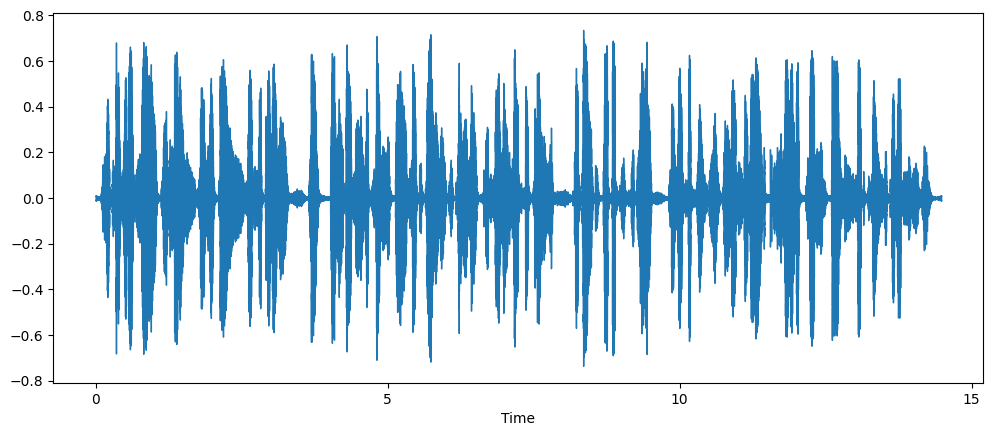

In [60]:
# Plot waveform
plt.figure().set_figwidth(12)
librosa.display.waveshow(example["audio"]["array"],
                         sr=example["audio"]["sampling_rate"])
plt.show()

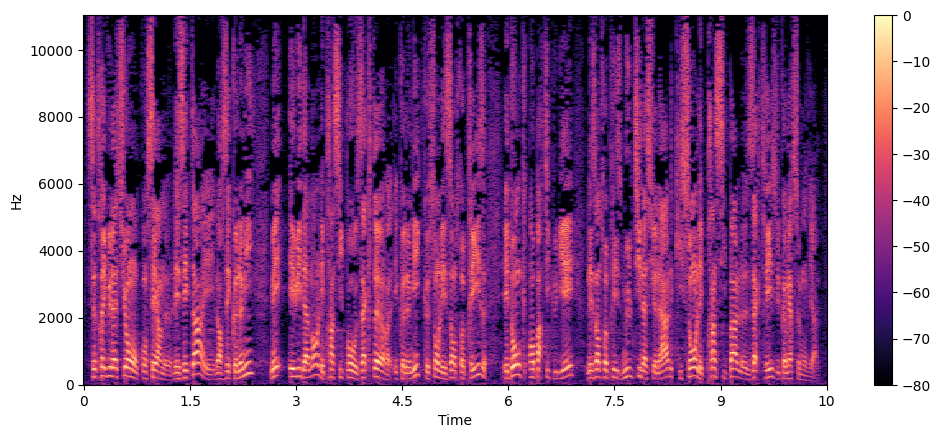

In [61]:
# Plot spectrogram
D = librosa.stft(example["audio"]["array"])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

#### 5. Go to Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example

In [62]:
# Use a pre-trained ASR and transcribe the example
from transformers import pipeline

asr = pipeline("automatic-speech-recognition",
               model="facebook/wav2vec2-large-xlsr-53-french")
asr(example["audio"]["array"])

{'text': 'cette régulation concerne les tats et leurs économies mais évidemment les principaux acteurs économiques que sont les entreprises est donc en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial'}

#### 6. Compare the transcription that you get from the pipeline to the transcription provided in the example

In [64]:
# Compare with ground truth
example["normalized_text"]

'cette régulation concerne les états et leurs économies mais évidemment les principaux acteurs économiques sont les entreprises et en particulier les entreprises multinationales qui sont les principales actrices du commerce mondial.'

## Unit 3. Transformers architecture for audio